# Uploading

In [1]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving gebaeude_batiment_edificio.csv to gebaeude_batiment_edificio.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_batiment_initial = pd.read_csv('gebaeude_batiment_edificio.csv', sep='\t')

<ipython-input-2-05dfe0e2f35a>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_batiment_initial = pd.read_csv('gebaeude_batiment_edificio.csv', sep='\t')


In [3]:
df_batiment = df_batiment_initial

In [4]:
df_batiment.shape

(245987, 47)

In [ ]:
df_batiment.count()

,0
EGID,245987
GDEKT,245987
GGDENR,245987
GGDENAME,245987
EGRID,221097
LGBKR,245892
LPARZ,245892
LPARZSX,0
LTYP,0
GEBNR,245850


In [ ]:
df_batiment.head()

,EGID,GDEKT,GGDENR,GGDENAME,EGRID,LGBKR,LPARZ,LPARZSX,LTYP,GEBNR,...,GWAERDATH2,GWAERZW1,GENW1,GWAERSCEW1,GWAERDATW1,GWAERZW2,GENW2,GWAERSCEW2,GWAERDATW2,GEXPDAT
0,101075652,VD,5401,Aigle,CH358183994597,0.0,3717,NaN,NaN,2943,...,NaN,7630.0,7520.0,869.0,2006-08-09,NaN,NaN,NaN,NaN,2024-11-10
1,101075653,VD,5401,Aigle,CH409945818349,0.0,3718,NaN,NaN,2944,...,NaN,7630.0,7520.0,869.0,2006-08-09,NaN,NaN,NaN,NaN,2024-11-10
2,101075656,VD,5401,Aigle,CH227824834564,0.0,1117,NaN,NaN,2931,...,NaN,7630.0,7520.0,869.0,2005-04-27,NaN,NaN,NaN,NaN,2024-11-10
3,101075657,VD,5401,Aigle,CH444583770360,0.0,3170,NaN,NaN,2935,...,NaN,7630.0,7520.0,869.0,2005-04-27,NaN,NaN,NaN,NaN,2024-11-10
4,101075658,VD,5401,Aigle,NaN,0.0,3670,NaN,NaN,2939a,...,NaN,7630.0,7520.0,869.0,2005-04-29,NaN,NaN,NaN,NaN,2024-11-10


In [ ]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving kodes_codes_codici.csv to kodes_codes_codici.csv


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df_codes = pd.read_csv('kodes_codes_codici.csv', sep='\t')

In [ ]:
df_codes.shape

(405, 9)

In [ ]:
# Display the first few rows to verify
df_codes.head()

,CECODID,CMERKM,CODTXTLD,CODTXTKD,CODTXTLF,CODTXTKF,CODTXTLI,CODTXTKI,CEXPDAT
0,0,DOFFADR,Nein,Nein,Non,Non,No,No,10.11.2024
1,0,GSCHUTZR,Nein,Nein,Non,Non,No,No,10.11.2024
2,0,WKCHE,Nein,Nein,Non,Non,No,No,10.11.2024
3,0,WMEHRG,Nein,Nein,Non,Non,No,No,10.11.2024
4,1,DOFFADR,Ja,Ja,Oui,Oui,Sì,Sì,10.11.2024


# Processing

1. As a first step, I'll drop the empty columns and culumns with less values (under revision and checking the importance of these columns).

In [5]:
# Drop columns that are entirely empty
df_batiment = df_batiment.dropna(axis=1, how='all')

In [6]:
df_batiment.shape

(245987, 42)

2. Now I want to delete the buildings that were demolished.

In [7]:
df_batiment = df_batiment[df_batiment["GSTAT"] != 1007]

In [9]:
df_batiment = df_batiment[df_batiment['GABBJ'].isna()]

In [10]:
df_batiment.shape

(237919, 42)

3. Let's remove columns that don't contain enough data.

In [ ]:
df_batiment.count()

,0
EGID,245987
GDEKT,245987
GGDENR,245987
GGDENAME,245987
EGRID,221097
LGBKR,245892
LPARZ,245892
GEBNR,245850
GBEZ,23449
GKODE,245987


We put threshold at 9% and then delete these columns.

In [12]:
threshold = 0.09  # 9%

# Calculate the percentage of non-null values for each column
non_null_percent = df_batiment.count() / len(df_batiment)

# Identify columns that have less than 8% non-null values
low_value_columns = non_null_percent[non_null_percent < threshold].index.tolist()

# Print the names of these columns
print("Columns with less than 9% values:")
for col in low_value_columns:
    print(col)

Columns with less than 9% values:
GBAUM
GABBJ
GAZZI


In [13]:
# Drop these columns
df_batiment = df_batiment.drop(columns=low_value_columns)

4. Let's remove some columns that unimportant for us.

- For example, GEXPDAT - it's the date of this dataset by ourselves.

In [14]:
# List the columns you want to remove
columns_to_remove = ["GEXPDAT"]

# Check which columns actually exist in df_batiment before dropping
columns_to_remove = [col for col in columns_to_remove if col in df_batiment.columns]

# Drop the specified columns
df_batiment = df_batiment.drop(columns=columns_to_remove)

In [15]:
df_batiment.shape

(237919, 38)

5. Download an updated version of initial dataset.

In [16]:
# Save the DataFrame as an Excel file
df_batiment.to_excel('df_batiment.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('df_batiment.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Descriptive statistics - Overall

0. Number of the buildings in the whole 'region'.

In [17]:
len(df_batiment['EGID'])

237919

1. Let's check only unique number of buildings: EGRID - "Identificateur fédéral d'immeuble (bien-fonds)"

In [18]:
len(df_batiment['EGRID'].unique())

132944

In [19]:
# Calculate the most frequent EGRID value and its frequency
most_frequent_egrid = df_batiment['EGRID'].mode()[0]  # Mode gives the most common value
frequency = df_batiment['EGRID'].value_counts()[most_frequent_egrid]

print(f"Most frequent EGRID: {most_frequent_egrid}")
print(f"Frequency: {frequency}")

Most frequent EGRID: CH238371458482
Frequency: 170


In [20]:
# Print the top 10 most frequent EGRID values
top_frequent_values = df_batiment['EGRID'].value_counts().head(10)
print("Top 10 most frequent EGRID values:")
print(top_frequent_values)

Top 10 most frequent EGRID values:
EGRID
CH238371458482    170
CH851183704561     89
CH798375424520     78
CH708145048382     74
CH174597828386     73
CH481583459862     66
CH938398458783     64
CH480583459445     64
CH114541837910     61
CH614527837666     60
Name: count, dtype: int64


2. Number of communes

In [21]:
len(df_batiment['GGDENR'].unique())

300

3. Dataset with unique values *(not for all columns)* + download it.

In [ ]:
# List of columns to exclude
columns_to_exclude = [
    "EGID", "EGRID","GKODE", "GKODN", "GKSCE",
    "GAREA", "GVOL", "GVOLNORM", "GVOLSCE", "GEBNR", "GSTAT",
    "LPARZ", "GEBF",
    "GWAERDATH1", "GWAERDATH2",
    "GWAERDATW1", "GWAERDATW2",
    "GEXPDAT"
]

# Ensure the columns to exclude are valid for your dataset
columns_to_exclude = [col for col in columns_to_exclude if col in df_batiment.columns]

# 1. Calculate unique values count for each column
unique_counts = df_batiment.nunique()

# 2. Create a dataset with unique values (excluding specific columns)
columns_to_include = [col for col in df_batiment.columns if col not in columns_to_exclude]
unique_values_dataset = {col: df_batiment[col].dropna().unique() for col in columns_to_include}

# Convert to DataFrame
unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values_dataset.items()]))

# Save the DataFrame as an Excel file
unique_values_df.to_excel('unique_values_dataset.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('unique_values_dataset.xlsx')

# Print results
#print("Unique counts for each column:\n", unique_counts)
#print("\nUnique values dataset:\n", unique_values_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Status of the buildings ('Statut du bâtiment', GSTAT)

In [22]:
len(df_batiment['GSTAT'].unique())

3

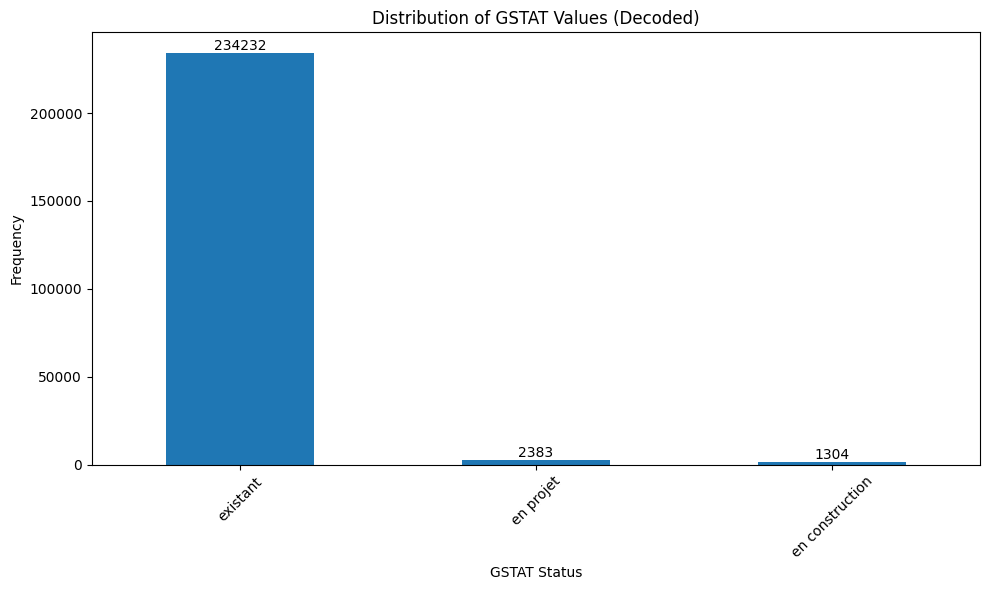

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Example code-to-text mapping
mapping = {
    1001: "en projet",
    1002: "autorisé",
    1003: "en construction",
    1004: "existant",
    1005: "non util.",
    1007: "démoli",
    1008: "non réalisé"
}

# Create a new column with the decoded values
df_batiment['GSTAT_decoded'] = df_batiment['GSTAT'].map(mapping)

# Count the frequency of each descriptive value
value_counts = df_batiment['GSTAT_decoded'].value_counts()

# Plot the bar chart
ax = value_counts.plot(kind='bar', figsize=(10,6))
plt.title('Distribution of GSTAT Values (Decoded)')
plt.xlabel('GSTAT Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

5. Category of the buildings ('Catégorie de bâtiment', GKAT)

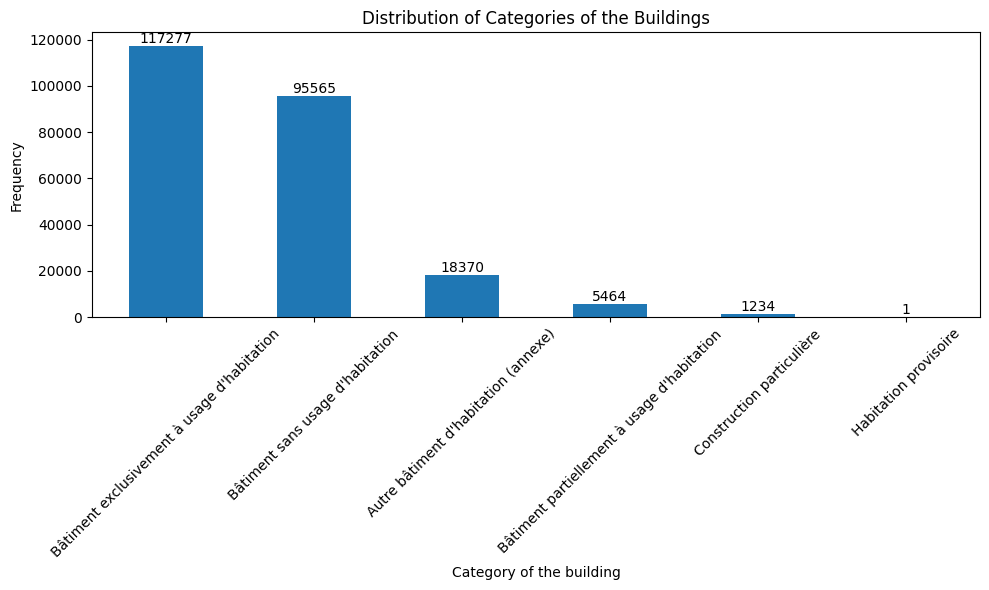

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# GKAT code-to-text mapping
gkat_mapping = {
    1010: "Habitation provisoire",
    1020: "Bâtiment exclusivement à usage d'habitation",
    1030: "Autre bâtiment d'habitation (annexe)",
    1040: "Bâtiment partiellement à usage d'habitation",
    1060: "Bâtiment sans usage d'habitation",
    1080: "Construction particulière"
}

# Create a new column with the decoded values for GKAT
df_batiment['GKAT_decoded'] = df_batiment['GKAT'].map(gkat_mapping)

# Count the frequency of each descriptive value
gkat_value_counts = df_batiment['GKAT_decoded'].value_counts()

# Plot the bar chart
ax = gkat_value_counts.plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Categories of the Buildings')
plt.xlabel('Category of the building')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

6. Class of the buildings ('Classe de bâtiment', GKLAS)

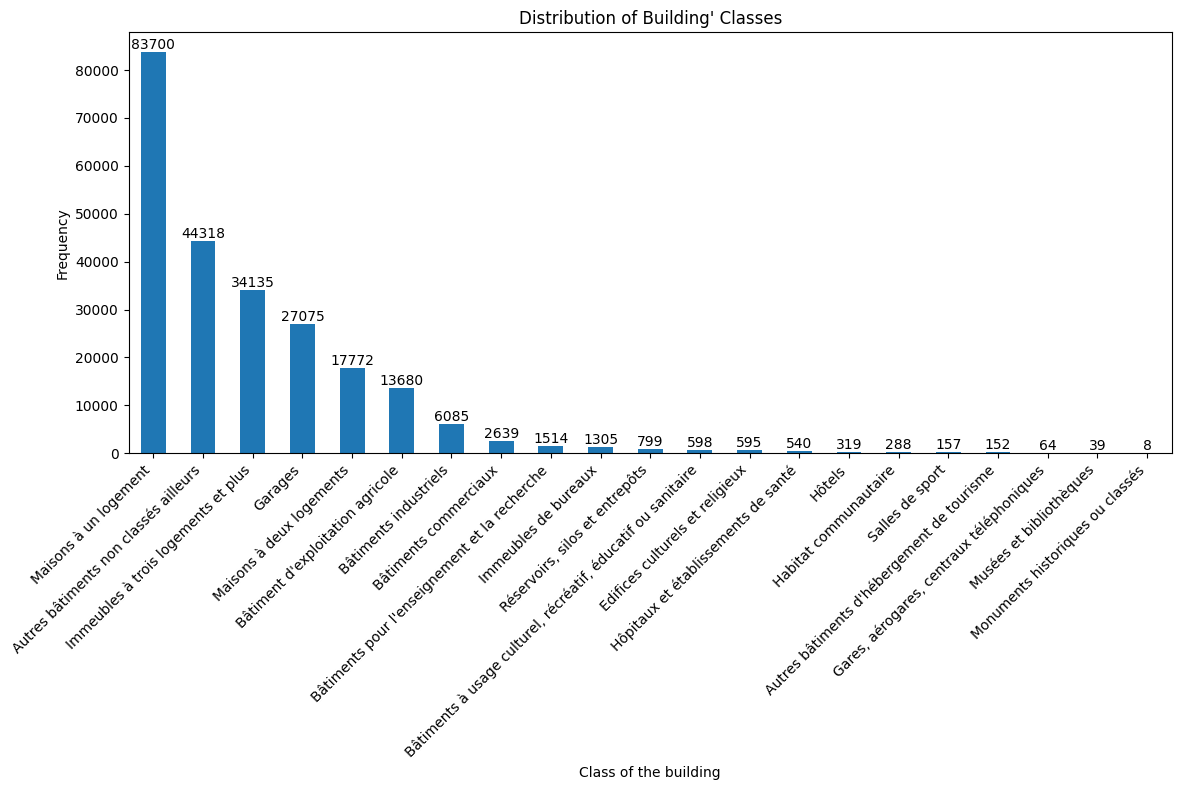

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# GKLAS code-to-text mapping (extended)
gklas_mapping = {
    11: "Bâtiments d'habitation",
    111: "Bâtiments d'habitation (générique)",
    1110: "Maisons à un logement",
    112: "Immeubles à deux logements ou plus (générique)",
    1121: "Maisons à deux logements",
    1122: "Immeubles à trois logements et plus",
    113: "Habitat communautaire (générique)",
    1130: "Habitat communautaire",
    12: "Bâtiments non résidentiels",
    121: "Hôtels et bâtiments d'hébergement (générique)",
    1211: "Hôtels",
    1212: "Autres bâtiments d'hébergement de tourisme",
    122: "Immeubles de bureaux (générique)",
    1220: "Immeubles de bureaux",
    123: "Bâtiments commerciaux (générique)",
    1230: "Bâtiments commerciaux",
    1231: "Restaurants et bars dans des bâtiments sans usage résidentiel",
    124: "Bâtiments pour les transports et les communications (générique)",
    1241: "Gares, aérogares, centraux téléphoniques",
    1242: "Garages",
    125: "Bâtiments industriels et entrepôts (générique)",
    1251: "Bâtiments industriels",
    1252: "Réservoirs, silos et entrepôts",
    126: "Bâtiments à usage culturel, récréatif, éducatif ou sanitaire (générique)",
    1261: "Bâtiments à usage culturel, récréatif, éducatif ou sanitaire",
    1262: "Musées et bibliothèques",
    1263: "Bâtiments pour l'enseignement et la recherche",
    1264: "Hôpitaux et établissements de santé",
    1265: "Salles de sport",
    127: "Autres bâtiments non résidentiels (générique)",
    1271: "Bâtiment d'exploitation agricole",
    1272: "Edifices culturels et religieux",
    1273: "Monuments historiques ou classés",
    1274: "Autres bâtiments non classés ailleurs",
    1275: "Autres bâtiments pour l'hébergement collectif",
    1276: "Bâtiments pour la garde d'animaux",
    1277: "Bâtiments pour les cultures végétales",
    1278: "Autres bâtiments d'exploitation agricole"
}

# Create a new column with the decoded values for GKLAS
df_batiment['GKLAS_decoded'] = df_batiment['GKLAS'].map(gklas_mapping)

# Count the frequency of each descriptive value
gklas_value_counts = df_batiment['GKLAS_decoded'].value_counts()

# Plot the bar chart
ax = gklas_value_counts.plot(kind='bar', figsize=(12,8))
plt.title("Distribution of Building' Classes")
plt.xlabel('Class of the building')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

7. Year when the building was constructed ('Année de construction du bâtiment', GBAUJ)

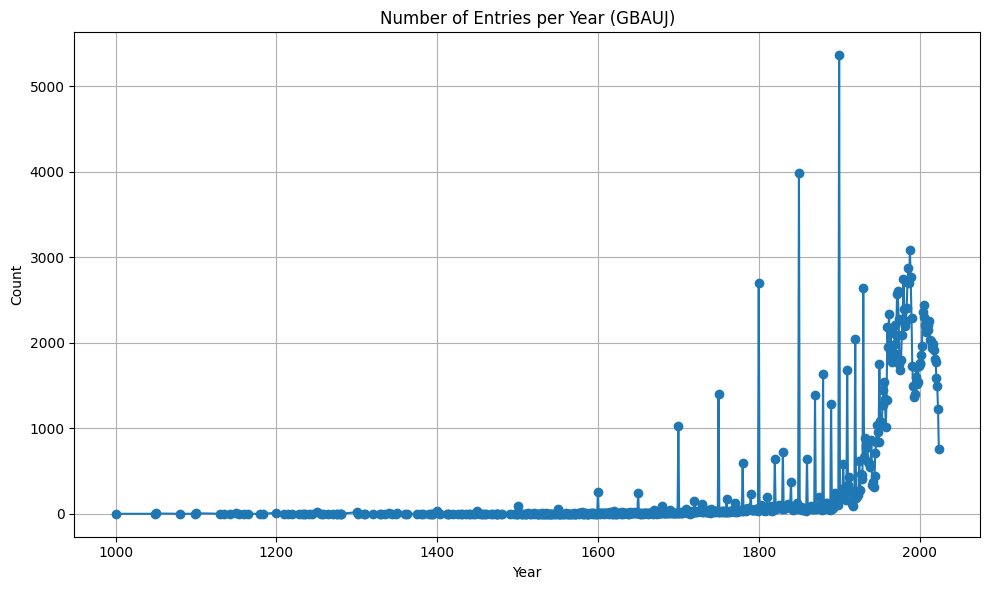

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the frequency of each year in the GBAUJ column
year_counts = df_batiment['GBAUJ'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(10,6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Entries per Year (GBAUJ)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

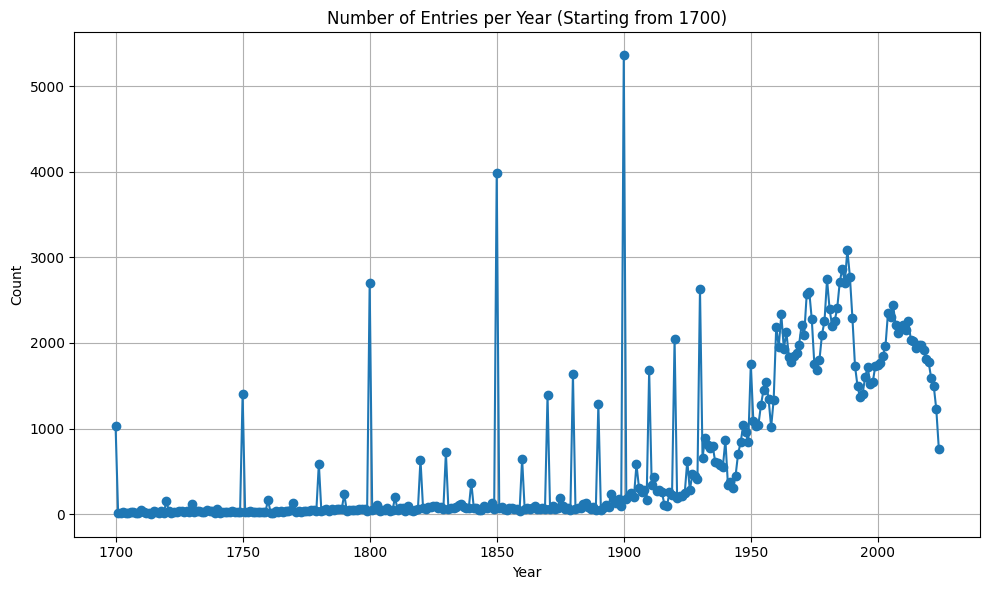

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only years >= 1700
df_filtered = df_batiment[df_batiment['GBAUJ'] >= 1700]

# Count the frequency of each year (>= 1700)
year_counts = df_filtered['GBAUJ'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(10,6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Entries per Year (Starting from 1700)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

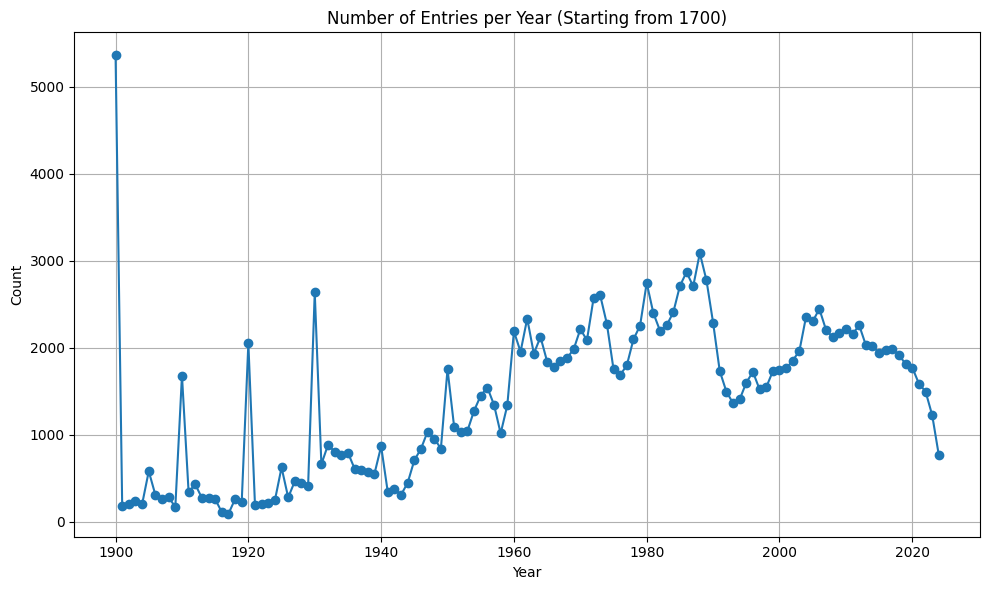

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only years >= 1900
df_filtered = df_batiment[df_batiment['GBAUJ'] >= 1900]

# Count the frequency of each year (>= 1900)
year_counts = df_filtered['GBAUJ'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(10,6))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.title('Number of Entries per Year (Starting from 1700)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

8. Surface area ('Surface du bâtiment', GAREA)

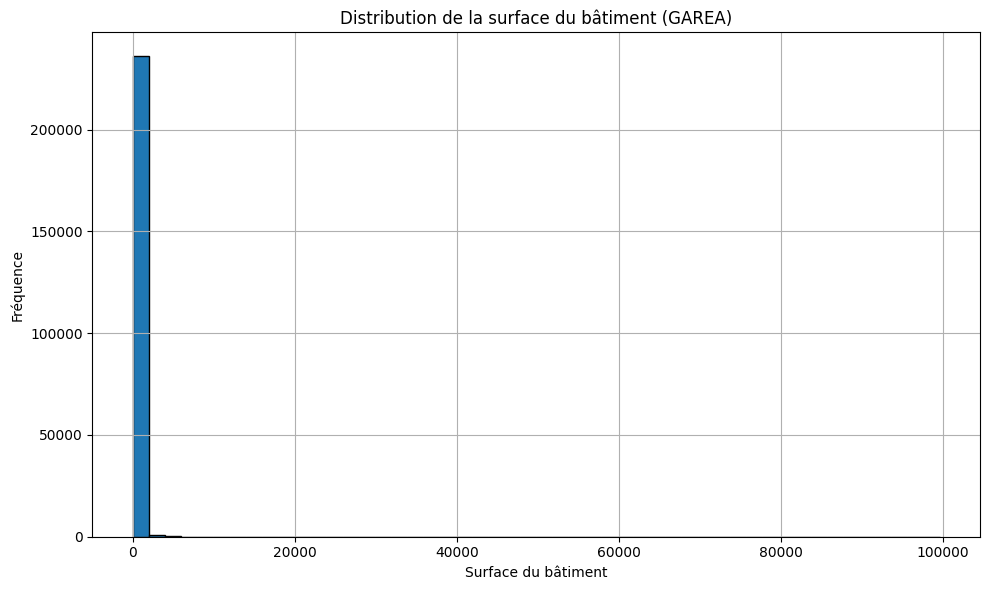

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a histogram of the GAREA values
plt.figure(figsize=(10,6))
plt.hist(df_batiment['GAREA'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution de la surface du bâtiment (GAREA)')
plt.xlabel('Surface du bâtiment')
plt.ylabel('Fréquence')
plt.grid(True)
plt.tight_layout()
plt.show()

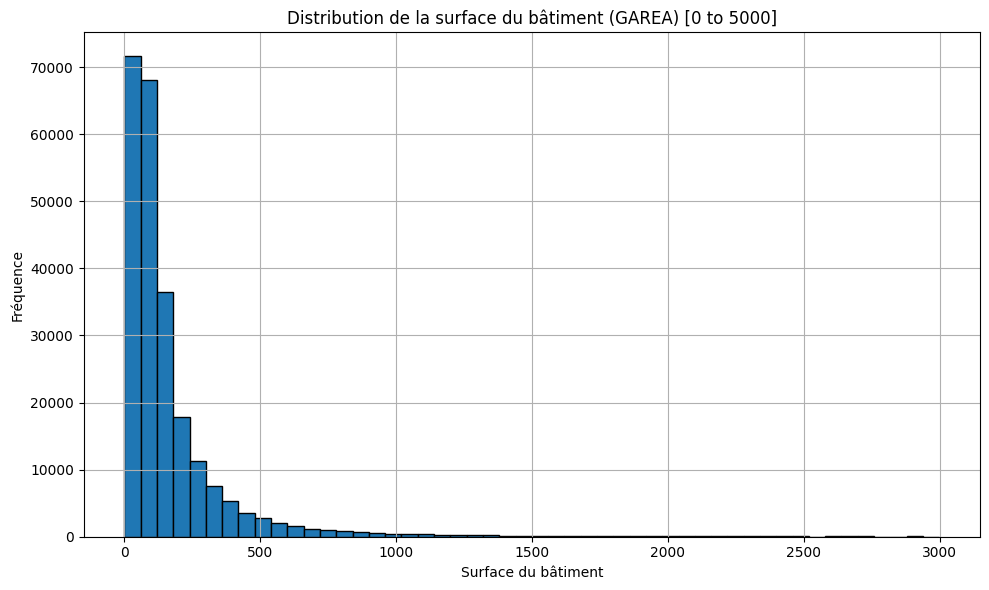

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to only include values from 0 to 3000
data_filtered = df_batiment['GAREA'].dropna()
data_filtered = data_filtered[(data_filtered >= 0) & (data_filtered <= 3000)]

# Plot a regular histogram
plt.figure(figsize=(10,6))
plt.hist(data_filtered, bins=50, edgecolor='black')

plt.title('Distribution de la surface du bâtiment (GAREA) [0 to 5000]')
plt.xlabel('Surface du bâtiment')
plt.ylabel('Fréquence')
plt.grid(True)
plt.tight_layout()

plt.show()

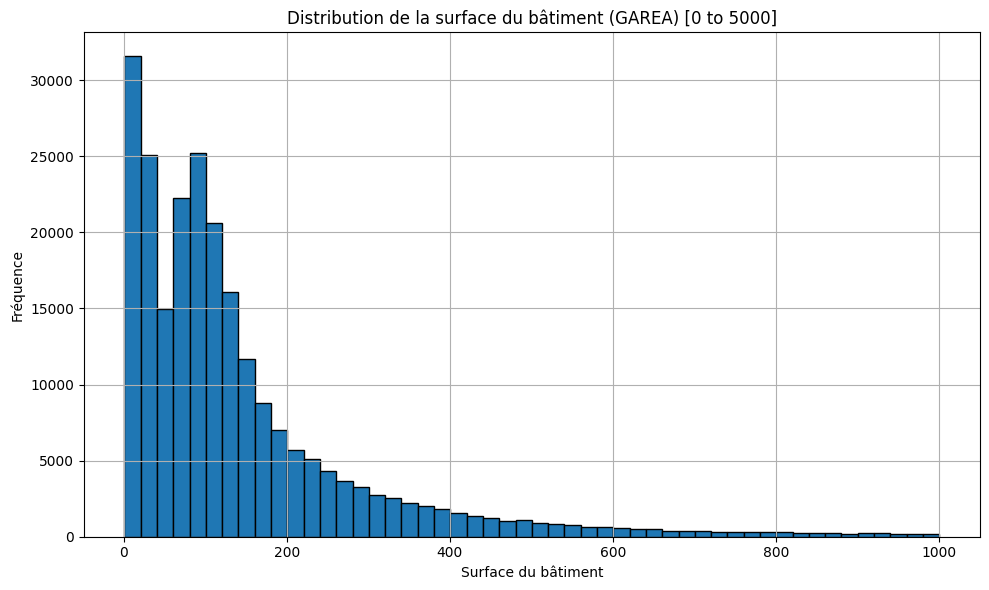

# New sub-datasets

## Category of the building

In [ ]:
# List the GKAT categories of interest
categories = [1020, 1060, 1030, 1040]

# Create a dictionary to store each category's dataset
category_datasets = {}

for cat in categories:
    # Filter rows matching the category and reset index
    df_category = df_batiment[df_batiment["GKAT"] == cat].reset_index(drop=True)
    category_datasets[cat] = df_category

# Example: Access the dataset for category 1020
df_1020 = category_datasets[1020]
df_1060 = category_datasets[1060]
df_1030 = category_datasets[1030]
df_1040 = category_datasets[1040]

# Now you have separate DataFrames for each category, all with reset indices.

In [ ]:
# Save the DataFrame as an Excel file
df_1020.to_excel('Bâtiment_exclusivement_à_usage_d_habitation.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiment_exclusivement_à_usage_d_habitation.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1060.to_excel('Bâtiment_sans_usage_d_habitation.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiment_sans_usage_d_habitation.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1030.to_excel('Autre_bâtiment_d_habitation.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Autre_bâtiment_d_habitation.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1040.to_excel('Bâtiment_partiellement_à_usage_d_habitation.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiment_partiellement_à_usage_d_habitation.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Class of the building

In [ ]:
import pandas as pd

# Example: select some GKLAS categories of interest
# (Replace these with whatever GKLAS codes you want to filter by.)
gklas_categories = [1110, 1274, 1122, 1242,
                    1121, 1271, 1130, 1211,
                    1220, 1230, 1251, 1261,
                    1262, 1263, 1264, 1265]

# Create a dictionary to store each category's dataset
gklas_datasets = {}

for cat in gklas_categories:
    # Filter rows matching the category and reset index
    df_gklas_category = df_batiment[df_batiment["GKLAS"] == cat].reset_index(drop=True)
    gklas_datasets[cat] = df_gklas_category

# Example: Access the dataset for a particular GKLAS category
df_1110 = gklas_datasets[1110]
df_1274 = gklas_datasets[1274]
df_1122 = gklas_datasets[1122]
df_1242 = gklas_datasets[1242]
df_1121 = gklas_datasets[1121]
df_1271 = gklas_datasets[1271]
df_1130 = gklas_datasets[1130]
df_1211 = gklas_datasets[1211]
df_1220 = gklas_datasets[1220]
df_1230 = gklas_datasets[1230]
df_1251 = gklas_datasets[1251]
df_1261 = gklas_datasets[1261]
df_1262 = gklas_datasets[1262]
df_1263 = gklas_datasets[1263]
df_1264 = gklas_datasets[1264]
df_1265 = gklas_datasets[1265]

# Now you have separate DataFrames for each chosen GKLAS category, all with reset indices.

In [ ]:
# Save the DataFrame as an Excel file
df_1110.to_excel('Maisons_à_un_logement.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Maisons_à_un_logement.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1274.to_excel('Autres_bâtiments_non_classés_ailleurs.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Autres_bâtiments_non_classés_ailleurs.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1122.to_excel('Immeubles_à_trois_logements_et_plus.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Immeubles_à_trois_logements_et_plus.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1242.to_excel('Garages.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Garages.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1121.to_excel('Maisons_à_deux_logements.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Maisons_à_deux_logements.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1271.to_excel('Bâtiment_d_exploitation_agricole.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiment_d_exploitation_agricole.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1130.to_excel('Habitat_communautaire.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Habitat_communautaire.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1211.to_excel('Hôtels.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Hôtels.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1220.to_excel('Immeubles_de_bureaux.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Immeubles_de_bureaux.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1230.to_excel('Bâtiments_commerciaux.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiments_commerciaux.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1251.to_excel('Bâtiments_industriels.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiments_industriels.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1261.to_excel('Bâtiments_à_usage_culturel_récréatif_éducatif_ou_sanitaire.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiments_à_usage_culturel_récréatif_éducatif_ou_sanitaire.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1262.to_excel('Musées_et_bibliothèques.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Musées_et_bibliothèques.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1263.to_excel('Bâtiments_pour_l_enseignement_et_la_recherche.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Bâtiments_pour_l_enseignement_et_la_recherche.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1264.to_excel('Hôpitaux_et_établissements_de_santé.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Hôpitaux_et_établissements_de_santé.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the DataFrame as an Excel file
df_1265.to_excel('Salles_de_sport.xlsx', index=False)

# Trigger the file download, you can choose the location on your local machine
files.download('Salles_de_sport.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>